In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [2]:
file = 'docs/metall_rates.csv'
df = pd.read_csv(file, decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    191 non-null    object 
 1   gold    191 non-null    float64
 2   silver  191 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


In [3]:
df.head()

,date,gold,silver
0,17.10.2020,4783.12,61.06
1,16.10.2020,4740.64,59.98
2,15.10.2020,4711.68,60.06
3,14.10.2020,4772.77,61.96
4,13.10.2020,4754.14,62.06


In [4]:
df['date'] = pd.to_datetime(df['date'],
                           format = '%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    191 non-null    datetime64[ns]
 1   gold    191 non-null    float64       
 2   silver  191 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.6 KB


In [5]:
df.tail(30)

,date,gold,silver
161,2020-02-19,3256.20,36.49
162,2020-02-18,3216.56,36.04
163,2020-02-15,3215.88,35.99
164,2020-02-14,3220.62,35.91
165,2020-02-13,3175.81,35.89
166,2020-02-12,3223.20,36.57
167,2020-02-11,3227.24,36.43
168,2020-02-08,3200.38,36.25
169,2020-02-07,3159.22,35.57
170,2020-02-06,3152.67,36.01


In [6]:
df.date = df.date.sort_values()

In [7]:
df.head(30)

,date,gold,silver
0,2020-10-17,4783.12,61.06
1,2020-10-16,4740.64,59.98
2,2020-10-15,4711.68,60.06
3,2020-10-14,4772.77,61.96
4,2020-10-13,4754.14,62.06
5,2020-10-10,4736.09,60.22
6,2020-10-09,4737.92,60.02
7,2020-10-08,4740.23,59.08
8,2020-10-07,4827.56,61.34
9,2020-10-06,4771.68,60.07


In [8]:
df.tail(30)

,date,gold,silver
161,2020-02-19,3256.20,36.49
162,2020-02-18,3216.56,36.04
163,2020-02-15,3215.88,35.99
164,2020-02-14,3220.62,35.91
165,2020-02-13,3175.81,35.89
166,2020-02-12,3223.20,36.57
167,2020-02-11,3227.24,36.43
168,2020-02-08,3200.38,36.25
169,2020-02-07,3159.22,35.57
170,2020-02-06,3152.67,36.01


In [9]:
# create date_range
# end - 2020-10-17
yeardays = pd.date_range(start=pd.datetime(2020, 1, 1),
                           end=pd.datetime(2020, 10, 17))
yeardays

<ipython-input-9-9d038bbcf9b8>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  yeardays = pd.date_range(start=pd.datetime(2020, 1, 1),
<ipython-input-9-9d038bbcf9b8>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end=pd.datetime(2020, 10, 17))


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11',
               '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15',
               '2020-10-16', '2020-10-17'],
              dtype='datetime64[ns]', length=291, freq='D')

In [10]:
# convert to DataFrame
yeardays = pd.DataFrame(yeardays)
yeardays = yeardays.rename(columns={0: "date"})
yeardays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    291 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [11]:
# merge two df's 
ndf = pd.merge(left=yeardays,
               right=df,
               on="date",
              how='outer')
ndf.head(35)

,date,gold,silver
0,2020-01-01,3031.25,35.48
1,2020-01-02,NaN,NaN
2,2020-01-03,NaN,NaN
3,2020-01-04,NaN,NaN
4,2020-01-05,NaN,NaN
5,2020-01-06,NaN,NaN
6,2020-01-07,NaN,NaN
7,2020-01-08,NaN,NaN
8,2020-01-09,NaN,NaN
9,2020-01-10,3047.28,36.26


In [12]:
ndf = ndf.ffill(axis = 0)
ndf.head(50)

,date,gold,silver
0,2020-01-01,3031.25,35.48
1,2020-01-02,3031.25,35.48
2,2020-01-03,3031.25,35.48
3,2020-01-04,3031.25,35.48
4,2020-01-05,3031.25,35.48
5,2020-01-06,3031.25,35.48
6,2020-01-07,3031.25,35.48
7,2020-01-08,3031.25,35.48
8,2020-01-09,3031.25,35.48
9,2020-01-10,3047.28,36.26


In [13]:
df = ndf
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    291 non-null    datetime64[ns]
 1   gold    291 non-null    float64       
 2   silver  291 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.1 KB


In [14]:
# df['formatted_date'] = pd.to_datetime(df['datetime'])
df['month'] = df['date'].apply(lambda x: x.month)
df['week'] = df['date'].apply(lambda x: x.weekofyear)

In [15]:
df['mean_per_week_gold'] = df.groupby('week')['gold'].transform('mean')
df['mean_per_week_silver'] = df.groupby('week')['silver'].transform('mean')
df['mean_per_month_gold'] = df.groupby('month')['gold'].transform('mean')
df['mean_per_month_silver'] = df.groupby('month')['silver'].transform('mean')
df.head(50)

,date,gold,silver,month,week,mean_per_week_gold,mean_per_week_silver,mean_per_month_gold,mean_per_month_silver
0,2020-01-01,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
1,2020-01-02,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2,2020-01-03,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
3,2020-01-04,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
4,2020-01-05,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
5,2020-01-06,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
6,2020-01-07,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
7,2020-01-08,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
8,2020-01-09,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
9,2020-01-10,3047.28,36.26,1,2,3039.068571,35.534286,3075.767742,35.521613


**Построить**
  1. Графики из тетрадки
  2. Из средних по месяцам взять и сравнить средние января и октября
  3. Скользящие средние на 50 дней

In [16]:
df.index = df['date']
df.drop('date',axis = 1, inplace = True)
df.head(50)

,gold,silver,month,week,mean_per_week_gold,mean_per_week_silver,mean_per_month_gold,mean_per_month_silver
date,,,,,,,,
2020-01-01,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-02,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-03,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-04,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-05,3031.25,35.48,1,1,3031.250000,35.480000,3075.767742,35.521613
2020-01-06,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
2020-01-07,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
2020-01-08,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613
2020-01-09,3031.25,35.48,1,2,3039.068571,35.534286,3075.767742,35.521613


In [17]:
df.columns

Index(['gold', 'silver', 'month', 'week', 'mean_per_week_gold',
       'mean_per_week_silver', 'mean_per_month_gold', 'mean_per_month_silver'],
      dtype='object')

In [18]:
for i in df.columns:
    print(i)

gold
silver
month
week
mean_per_week_gold
mean_per_week_silver
mean_per_month_gold
mean_per_month_silver


In [19]:
# silver_list = ['silver', 'mean_per_week_silver', 'mean_per_month_silver']
silver_list = ['silver', 'mean_per_week_silver']
# gold_list = ['gold', 'mean_per_week_gold', 'mean_per_month_gold']
gold_list = ['gold', 'mean_per_week_gold']

In [20]:
def plot_for_list(metall_list):
    for i in metall_list:
        df[i].plot(figsize=(20,6))

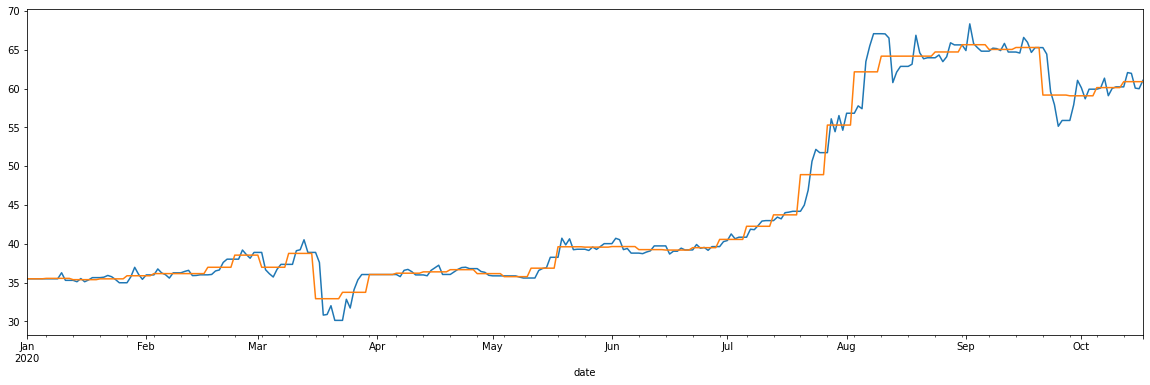

In [21]:
plot_for_list(silver_list)

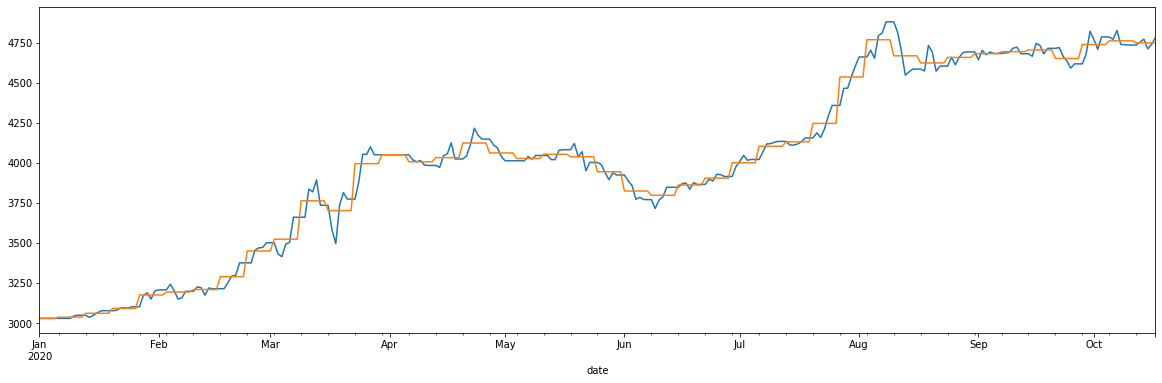

In [22]:
plot_for_list(gold_list)

In [30]:
def seasonal_decompose_plot(result, i):
    fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex = True, figsize = (12,10))

    # ----------------------------------------------------------------------------------------------------
    # plot the data
    # using this cool thread:
    # https://stackoverflow.com/questions/45184055/how-to-plot-multiple-seasonal-decompose-plots-in-one-figure
    # This allows us to have more control over the plots

    # plot the original data
    result.observed.plot(ax = axes[0], legend = False)
    axes[0].set_ylabel('График')
    axes[0].set_title(f"Декомпозиция временного ряда 2020 ({i})")

    # plot the trend
    result.trend.plot(ax = axes[1], legend = False)
    axes[1].set_ylabel('Тренд')

    # plot the seasonal part
    result.seasonal.plot(ax = axes[2], legend = False)
    axes[2].set_ylabel('Сезонная компонента')

    # plot the residual
    result.resid.plot(ax = axes[3], legend = False)
    axes[3].set_ylabel('Остаточная компонента')

    # ----------------------------------------------------------------------------------------------------
    # prettify the plot

    # get the xticks and the xticks labels
    # xtick_location = df.index.tolist()[::6]
    # xtick_labels = df["new_date"].tolist()[::6]

    # set the xticks to be every 6'th entry
    # every 6 months
    # ax.set_xticks(xtick_location)

    # chage the label from '1949-01-01 00:00:00' to this 'Jan-1949'
    # ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'});

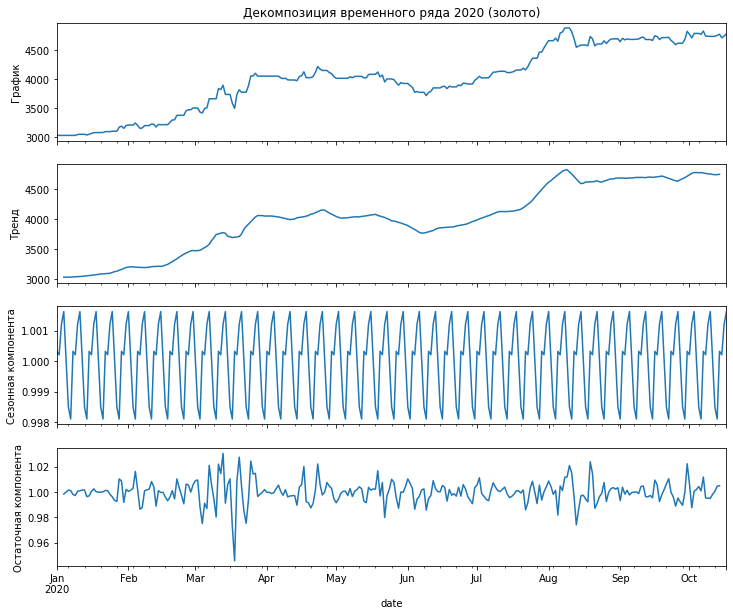

In [31]:
result = seasonal_decompose(df['gold'], model='multiplicative')
seasonal_decompose_plot(result, 'золото')

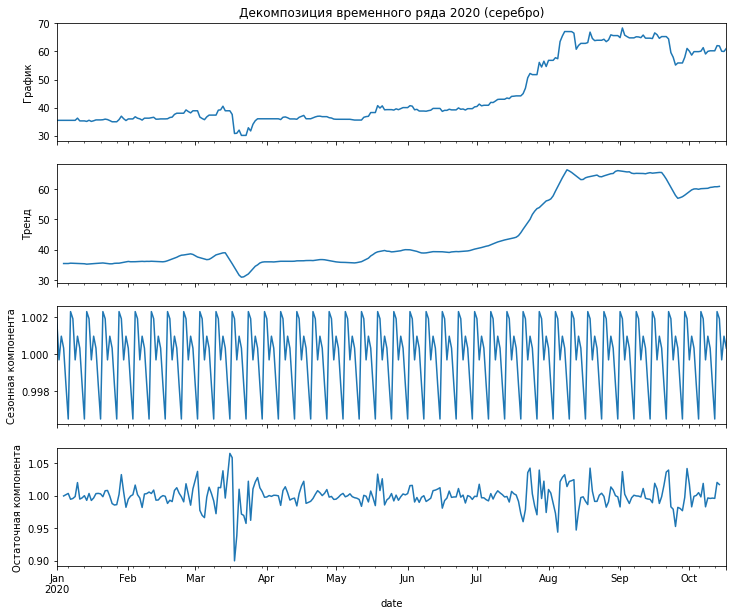

In [33]:
result = seasonal_decompose(df['silver'], model='multiplicative')
seasonal_decompose_plot(result, 'серебро')

In [26]:
# тут построить разложения по месяцам

In [34]:
last_month = pd.to_datetime("2020-10-01").date()

In [35]:
df.tail()

,gold,silver,month,week,mean_per_week_gold,mean_per_week_silver,mean_per_month_gold,mean_per_month_silver
date,,,,,,,,
2020-10-13,4754.14,62.06,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-14,4772.77,61.96,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-15,4711.68,60.06,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-16,4740.64,59.98,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-17,4783.12,61.06,10,42,4749.74,60.89,4758.078824,60.284118


In [37]:
df_last_month = df[last_month:]
df_last_month.tail()

,gold,silver,month,week,mean_per_week_gold,mean_per_week_silver,mean_per_month_gold,mean_per_month_silver
date,,,,,,,,
2020-10-13,4754.14,62.06,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-14,4772.77,61.96,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-15,4711.68,60.06,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-16,4740.64,59.98,10,42,4749.74,60.89,4758.078824,60.284118
2020-10-17,4783.12,61.06,10,42,4749.74,60.89,4758.078824,60.284118


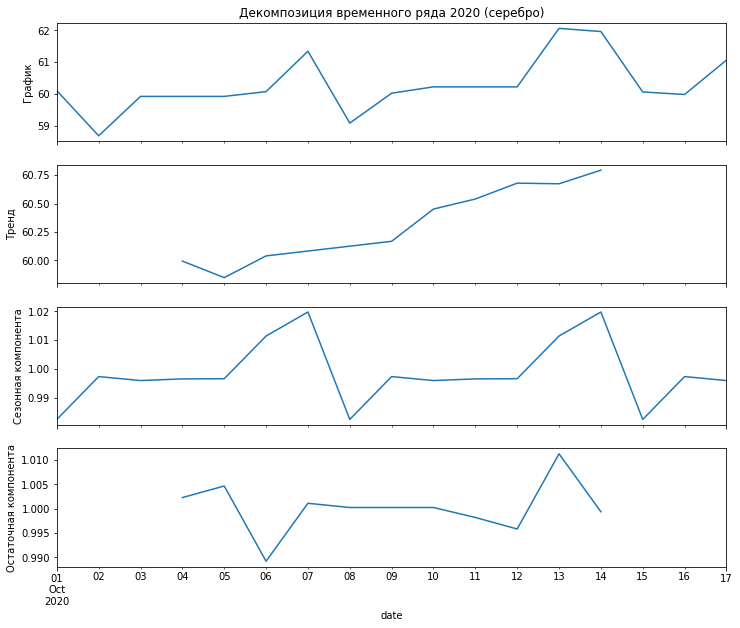

In [38]:
result = seasonal_decompose(df_last_month['silver'], model='multiplicative')
seasonal_decompose_plot(result, 'серебро')

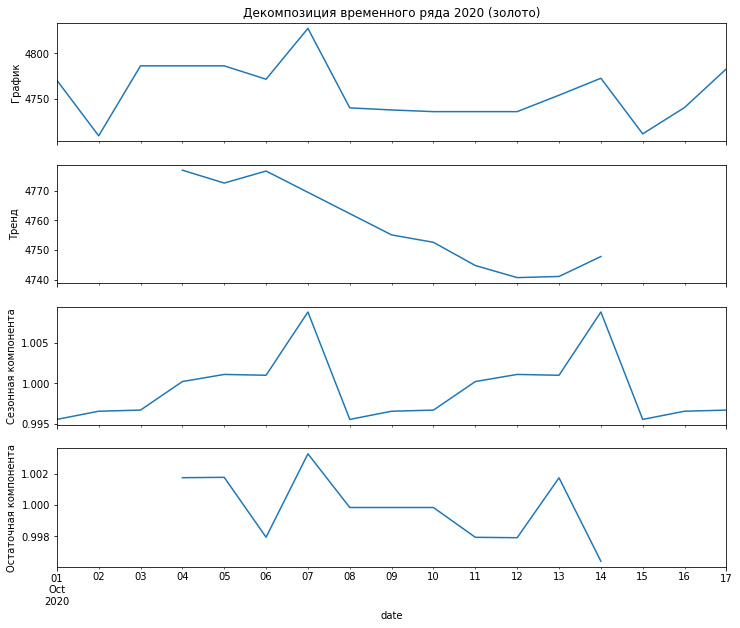

In [39]:
result = seasonal_decompose(df_last_month['gold'], model='multiplicative')
seasonal_decompose_plot(result, 'золото')

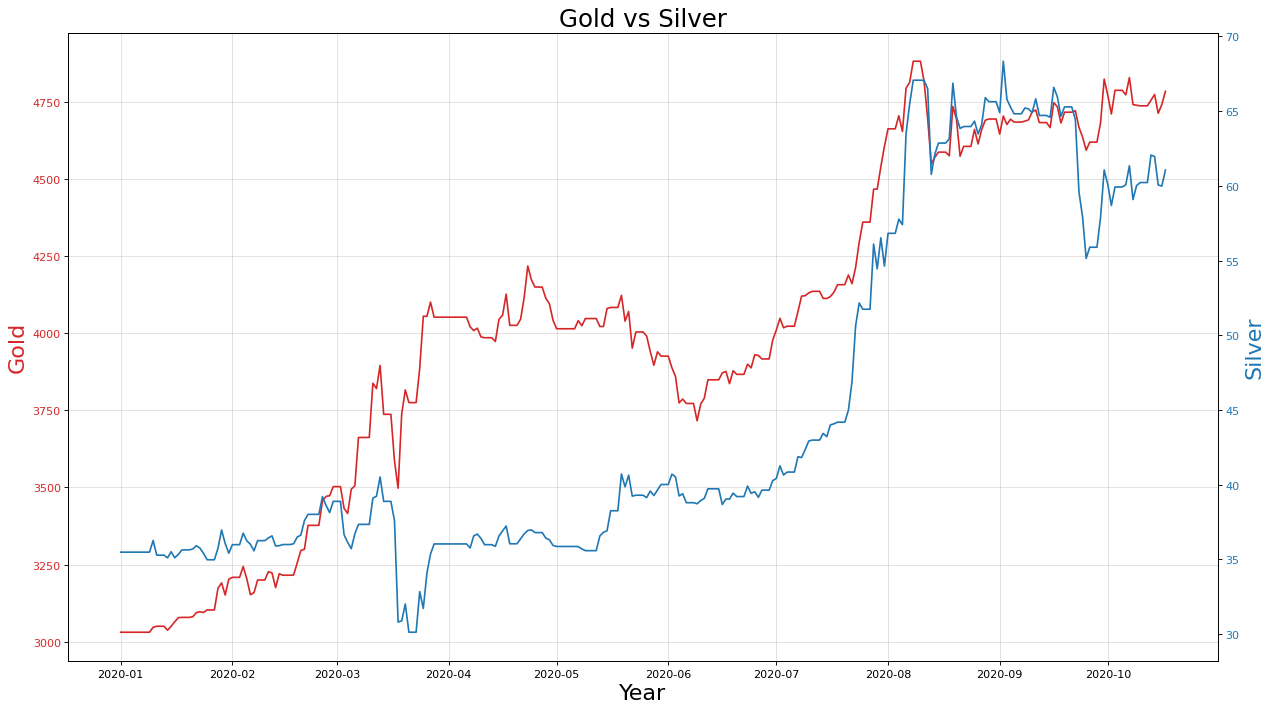

In [40]:
# золото и серебро

# x = df['date']
y1 = df['gold']
y2 = df['silver']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
# ax1.plot(x, y1, color='tab:red')
ax1.plot(y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.plot(x, y2, color='tab:blue')
ax2.plot(y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
# ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Gold', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Silver", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
# ax2.set_xticks(np.arange(0, len(x), 60))
# ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Gold vs Silver", fontsize=22)
fig.tight_layout()
plt.show()

In [41]:
# тут можно построить такие сравнения по месяцам

In [42]:
# график сезонов
def metall_trend_monthly(metall):
    mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue']
    months = ['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь']
    plt.figure(figsize=(16,10), dpi= 80)
    plt.title('Сравнение сезонных трендов по месяцам')
    plt.xlabel('day of month', fontsize=14)
    plt.ylabel('price', fontsize=14)
    lines = []
    for i, y in enumerate(df[metall].groupby(pd.Grouper(freq='M'))):
        p,=plt.plot(range(len(y[1])),y[1], color=mycolors[i], label=months[i])
        lines.append(p)
    plt.legend(handles=lines)

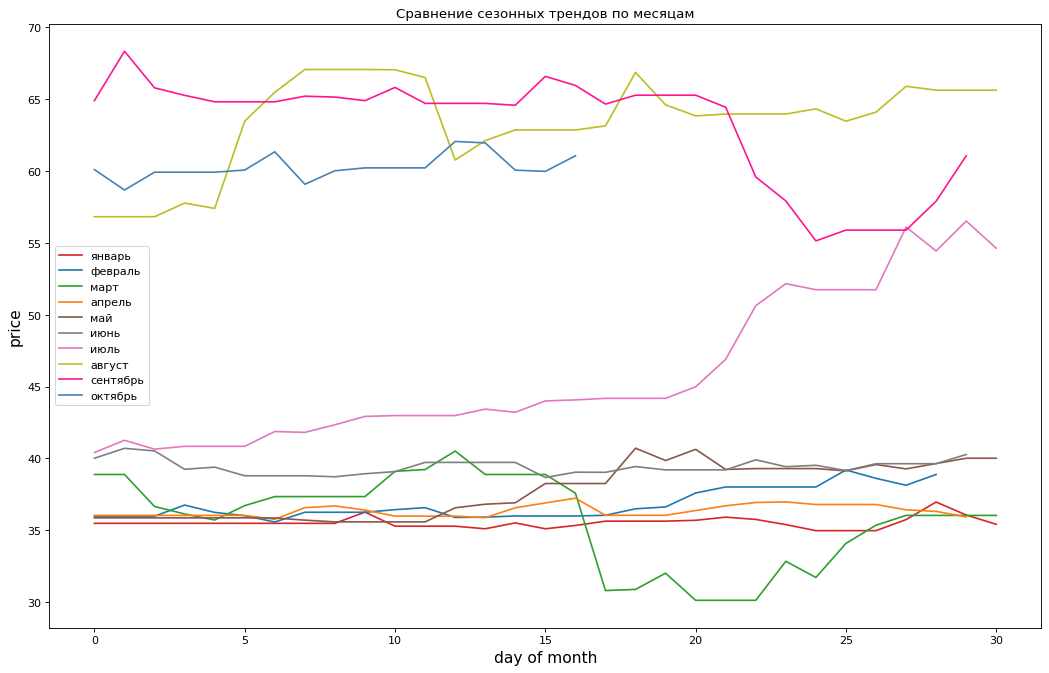

In [43]:
metall_trend_monthly('silver')

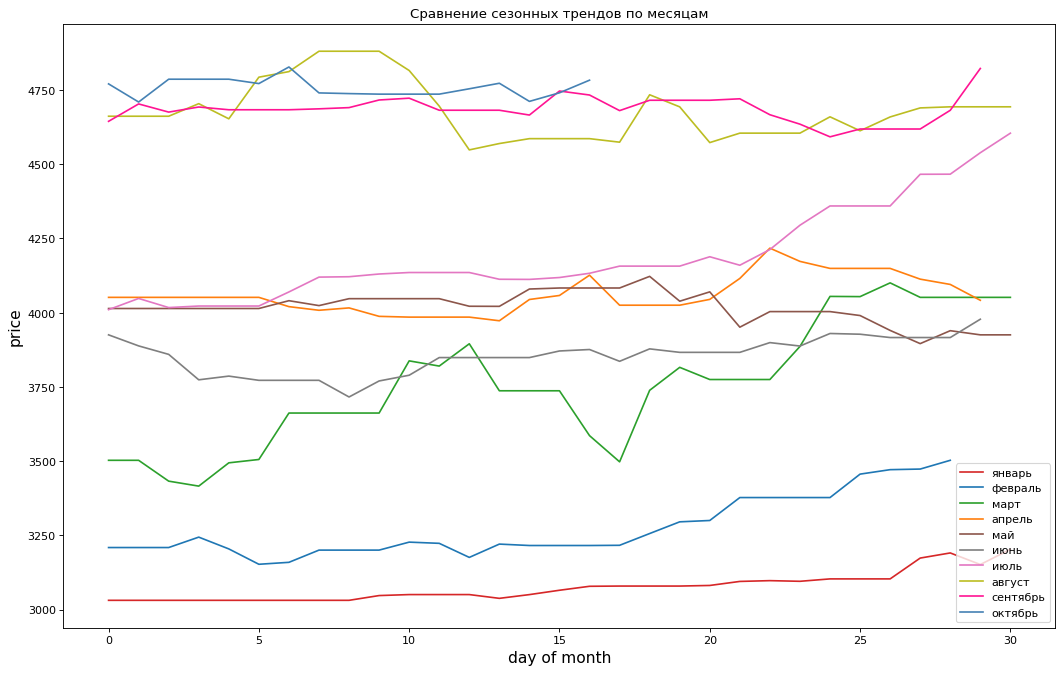

In [44]:
metall_trend_monthly('gold')

In [ ]:
# по неделям - работает плохо

# mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue']
# week_days = ['понедельник','вторник','среда','четверг','пятница','суббота','воскресенье']
# plt.figure(figsize=(16,10), dpi= 80)
# plt.title('Сравнение сезонных трендов по неделям')
# plt.xlabel('day of week', fontsize=14)
# plt.ylabel('price', fontsize=14)
# lines = []
# for i, y in enumerate(df['silver'].groupby(pd.Grouper(freq='W'))):
#     p,=plt.plot(range(len(y[1])),y[1], color=mycolors[i], label=week_days[i])
#     lines.append(p)
# plt.legend(handles=lines)

In [45]:
# from datetime import date

In [46]:
allbanks = pd.read_csv('docs/allbanks.csv', 
                       encoding='cp1251', 
                       sep=';', 
                       index_col=0)
allcoins = pd.read_csv('docs/allcoins.csv', 
                       encoding='cp1251', 
                       sep=';', 
                       index_col=0)
prices = pd.read_csv('docs/prices.csv', 
                     encoding='cp1251', 
                     sep=';')

In [47]:
allbanks.head()

,rus_name,eng_name,obsolete
id,,,
1,ПАО АКБ «АВАНГАРД»,avangard,NaN
2,АО КБ «АГРОПРОМКРЕДИТ»,agropromcredit,NaN
3,«Азиатско-Тихоокеанский Банк» (ПАО),atb,NaN
4,ПАО «АК БАРС» БАНК,NaN,NaN
5,АО «Банк Акцепт»,NaN,NaN


In [48]:
allcoins.head()

,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id
id,,,,,,,,,
1,3213-0010,Червонец,1,709851600,1,10,6565000,Au-900,6
2,5109-0127,Ростехнадзор,1,1572901200,2,1,3000,Ag-925,3
3,5109-0123,Росреестр,1,1534280400,2,1,3000,Ag-925,3
4,5109-0122,100-летие военных комиссариатов,1,1521061200,2,1,3000,Ag-925,3
5,5109-0121,СК России,1,1514408400,2,1,3000,Ag-925,2


In [49]:
allcoins.DT = pd.to_datetime(allcoins.DT, unit='s').dt.date
allcoins.head()

,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id
id,,,,,,,,,
1,3213-0010,Червонец,1,1992-06-29,1,10,6565000,Au-900,6
2,5109-0127,Ростехнадзор,1,2019-11-04,2,1,3000,Ag-925,3
3,5109-0123,Росреестр,1,2018-08-14,2,1,3000,Ag-925,3
4,5109-0122,100-летие военных комиссариатов,1,2018-03-14,2,1,3000,Ag-925,3
5,5109-0121,СК России,1,2017-12-27,2,1,3000,Ag-925,2


In [50]:
prices.head()

,operation_id,id_bank,id_coin,date,sell_price,comment
0,1,2,358,1.587111e+09,2700.0,NaN
1,2,2,359,1.587111e+09,11200.0,NaN
2,3,2,1092,1.587111e+09,2500.0,NaN
3,4,2,581,1.587111e+09,14000.0,NaN
4,5,2,1246,1.587111e+09,12000.0,NaN


In [51]:
prices.date = pd.to_datetime(prices.date, unit='s').dt.date
prices.head()

,operation_id,id_bank,id_coin,date,sell_price,comment
0,1,2,358,2020-04-17,2700.0,NaN
1,2,2,359,2020-04-17,11200.0,NaN
2,3,2,1092,2020-04-17,2500.0,NaN
3,4,2,581,2020-04-17,14000.0,NaN
4,5,2,1246,2020-04-17,12000.0,NaN


In [52]:
result_df = prices.merge(allcoins, left_on = 'id_coin', right_index=True)
result_df.head()

,operation_id,id_bank,id_coin,date,sell_price,comment,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id
0,1,2,358,2020-04-17,2700.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3
147,148,2,358,2020-04-17,2700.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3
307,308,22,358,2020-04-17,3500.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3
328,329,2,358,2020-04-17,2700.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3
488,489,22,358,2020-04-17,3500.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3


In [53]:
result_df = result_df.merge(allbanks, left_on = 'id_bank', right_index=True)
result_df.head()

,operation_id,id_bank,id_coin,date,sell_price,comment,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id,rus_name,eng_name,obsolete
0,1,2,358,2020-04-17,2700.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3,АО КБ «АГРОПРОМКРЕДИТ»,agropromcredit,NaN
147,148,2,358,2020-04-17,2700.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3,АО КБ «АГРОПРОМКРЕДИТ»,agropromcredit,NaN
328,329,2,358,2020-04-17,2700.0,NaN,5111-0395,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,3,3000,Ag-925,3,АО КБ «АГРОПРОМКРЕДИТ»,agropromcredit,NaN
1,2,2,359,2020-04-17,11200.0,NaN,5115-0147,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,25,1000,Ag-925,3,АО КБ «АГРОПРОМКРЕДИТ»,agropromcredit,NaN
148,149,2,359,2020-04-17,11200.0,NaN,5115-0147,200-летие со дня рождения И.С. Тургенева,20,2018-10-24,2,25,1000,Ag-925,3,АО КБ «АГРОПРОМКРЕДИТ»,agropromcredit,NaN


In [54]:
# visualization

In [55]:
allcoins['metal'].unique()

array(['Au-900', 'Ag-925', 'Сталь с никелевым гальваническим покрытием',
       'Нейзильбер', 'Мельхиор', 'Медь, никель', 'Ag-999',
       'Ag-925/Au-999', 'Ag-900/Au-900', 'Au-900/Ag-900', 'Ag-900',
       'Сталь с латунным гальваническим покрытием', 'Латунь',
       'Латунь/Мельхиор', 'Латунь/Медь, никель', 'Au-999',
       'Медно-никелевый сплав', 'Ag-925/позолота', 'Pd-999', 'Pt-999',
       'Ag-500', 'Сталь с латунным/никелевым гальваническим покрытием',
       'AU-900/Ag-925', 'Нейзильбер/Латунь', 'Медь, цинк/Медь, никель'],
      dtype=object)

In [56]:
nedrag_list = ['Медно-никелевый сплав',
               'Сталь с латунным/никелевым гальваническим покрытием',
               'Сталь с латунным гальваническим покрытием', 
               'Латунь/Мельхиор',
               'Сталь с никелевым гальваническим покрытием', 
               'Мельхиор',
               'Нейзильбер', 
               'Медь, никель', 
               'Латунь',
               'Латунь/Медь, никель', 
               'Нейзильбер/Латунь',
               'Медь, цинк/Медь, никель']

In [57]:
gold_list = ['Au-999',
             'Au-900']

In [58]:
silver_list = ['Ag-925', 
               'Ag-999', 
               'Ag-900', 
               'Ag-500']

In [59]:
combine_metal_list = ['Ag-900/Au-900', 
                      'Ag-925/Au-999', 
                      'Ag-925/позолота', 
                      'Pd-999', 
                      'Pt-999', 
                      'AU-900/Ag-925', 
                      'Ag-925/Au-999', 
                      'Ag-900/Au-900', 
                      'Au-900/Ag-900']

In [60]:
allcoins_gold = allcoins[allcoins['metal'].isin(gold_list)]
allcoins_gold.metal.unique()

array(['Au-900', 'Au-999'], dtype=object)

In [61]:
allcoins_silver = allcoins[allcoins['metal'].isin(silver_list)]
allcoins_silver.metal.unique()

array(['Ag-925', 'Ag-999', 'Ag-900', 'Ag-500'], dtype=object)

In [62]:
allcoins_nedrag = allcoins[allcoins['metal'].isin(nedrag_list)]
allcoins_nedrag.metal.unique()

array(['Сталь с никелевым гальваническим покрытием', 'Нейзильбер',
       'Мельхиор', 'Медь, никель',
       'Сталь с латунным гальваническим покрытием', 'Латунь',
       'Латунь/Мельхиор', 'Латунь/Медь, никель', 'Медно-никелевый сплав',
       'Сталь с латунным/никелевым гальваническим покрытием',
       'Нейзильбер/Латунь', 'Медь, цинк/Медь, никель'], dtype=object)

In [63]:
allcoins_combine = allcoins[allcoins['metal'].isin(combine_metal_list)]
allcoins_combine.metal.unique()

array(['Ag-925/Au-999', 'Ag-900/Au-900', 'Au-900/Ag-900',
       'Ag-925/позолота', 'Pd-999', 'Pt-999', 'AU-900/Ag-925'],
      dtype=object)

In [64]:
startdate = pd.to_datetime("2017-01-01").date()

In [65]:
allcoins_gold_3_years = allcoins_gold[allcoins_gold['DT'] >= startdate]
allcoins_gold_3_years.head()

,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id
id,,,,,,,,,
224,5216-0060-20,Георгий Победоносец,1,2020-01-13,1,50,500000,Au-999,5
225,5216-0119,70 лет установления дипломатических отношений ...,1,2019-06-02,2,50,500,Au-999,3
226,5216-0060-19,Георгий Победоносец,1,2019-01-08,1,50,300000,Au-999,5
227,5216-0060-18,Георгий Победоносец,1,2018-08-29,1,50,150000,Au-999,5
313,5216-0118,100-летие образования Республики Башкортостан,7,2019-01-31,2,50,1000,Au-999,3


In [66]:
allcoins_silver_3_years = allcoins_silver[allcoins_silver['DT'] >= startdate]
allcoins_silver_3_years.head()

,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id
id,,,,,,,,,
2,5109-0127,Ростехнадзор,1,2019-11-04,2,1,3000,Ag-925,3
3,5109-0123,Росреестр,1,2018-08-14,2,1,3000,Ag-925,3
4,5109-0122,100-летие военных комиссариатов,1,2018-03-14,2,1,3000,Ag-925,3
5,5109-0121,СК России,1,2017-12-27,2,1,3000,Ag-925,2
6,5109-0117,Казначейство России,1,2017-11-20,2,1,3000,Ag-925,2


In [67]:
allcoins_nedrag_3_years = allcoins_nedrag[allcoins_nedrag['DT'] >= startdate]
allcoins_nedrag_3_years.head()

,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id
id,,,,,,,,,
30,5710-0018,Город-герой Керчь,1,2017-04-19,1,2,5000000,Сталь с никелевым гальваническим покрытием,2
31,5710-0019,Город-герой Севастополь,1,2017-04-19,1,2,5000000,Сталь с никелевым гальваническим покрытием,2
166,5712-0050,"Памятная монета, посвященная пятой годовщине р...",1,2019-03-11,1,5,2000000,Сталь с никелевым гальваническим покрытием,2
189,5015-0027,25-летие принятия Конституции Российской Федер...,1,2018-12-09,1,25,1000000,Медно-никелевый сплав,2
190,5015-0024,Армейские международные игры,1,2018-06-03,1,25,500000,Медно-никелевый сплав,2


In [68]:
allcoins_combine_3_years = allcoins_combine[allcoins_combine['DT'] >= startdate]
allcoins_combine_3_years.head()

,cat_number,coin_name,series_id,DT,Qlty,Nominal,Mintage,metal,Mint_id
id,,,,,,,,,


In [79]:
def get_plot_count(datafr, i):
    ax = sns.countplot(datafr['Nominal'])
#     ax.figsize=(15, 10)
    ax.set(xlabel='Номинал монет', 
           ylabel='Количество видов')
    plt.suptitle(f'Количество видов монет {i}', size = 14)
    plt.title('за последние 3 года', size = 12)

    plt.show()

/Users/sergeyilyin/CodeProjects/cbr_metall_analytics/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


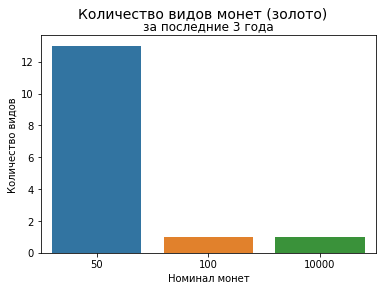

In [80]:
get_plot_count(allcoins_gold_3_years, '(золото)')

/Users/sergeyilyin/CodeProjects/cbr_metall_analytics/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


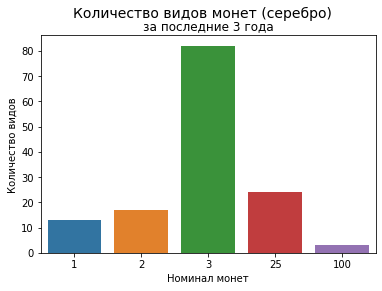

In [81]:
get_plot_count(allcoins_silver_3_years, '(серебро)')

/Users/sergeyilyin/CodeProjects/cbr_metall_analytics/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


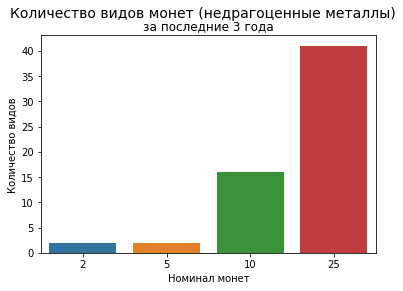

In [82]:
get_plot_count(allcoins_nedrag_3_years, '(недрагоценные металлы)')

In [ ]:
# ВОТ ОТСЮДА

In [ ]:
result_df.head()

In [83]:
result_df_gold = result_df[result_df['metal'].isin(gold_list)]
result_df_gold.Nominal.unique()

array([   50,   100, 25000, 10000,    10,  1000])

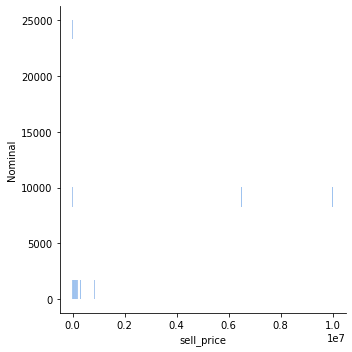

In [85]:
# sns.displot(result_df_gold, 
#             x="sell_price",
#             y = "Nominal")
# #             hue="Nominal")

/Users/sergeyilyin/CodeProjects/cbr_metall_analytics/venv/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/sergeyilyin/CodeProjects/cbr_metall_analytics/venv/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


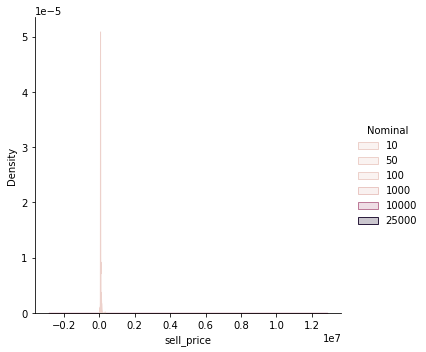

In [87]:
# sns.displot(result_df_gold, 
#             x="sell_price",
#             y = "Nominal")
# #             hue="Nominal")

sns.displot(result_df_gold, 
            x="sell_price",
            hue="Nominal", 
            kind="kde", 
            fill=True)

In [ ]:
# df.to_csv('docs/drags.csv')